# Airplane Price Prediction

# Introduction
This project leverages supervised machine learning techniques to predict the price of airplanes based on various attributes such as model, engine type, capacity, fuel consumption, and more. The goal is to build a regression model that accurately estimates the price using historical aircraft data.

I will use:

PyCaret for model comparison, tuning, and selection
The dataset contains 12,377 airplane records with 11 features, and no missing data.

Problem Type
Since the target variable (Price in $) is continuous, this is a regression problem.

## Project Summary
This project focused on predicting airplane prices using supervised regression modeling with the help of PyCaret, an automated machine learning library. The workflow included:

Data Loading and EDA: The dataset was loaded and visualized to understand the structure, spot patterns, and detect outliers.

Regression Setup: PyCaret’s regression module was initialized using setup(), with normalization and target transformation to improve model performance.

Model Comparison: Multiple regression algorithms were evaluated using compare_models() to identify the most promising model.

Model Tuning: The best model was fine-tuned using tune_model() to optimize hyperparameters for better predictive accuracy.

Model Evaluation: Performance was visualized and validated using evaluate_model() and metrics were extracted using pull().

Model Export: The final tuned regression model was saved using save_model() for future predictions.

## Import Library 
In this section, import all necessary Python libraries required for data analysis, visualization, and machine learning.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
from pycaret.regression import setup, create_model, tune_model, plot_mode

### Exploratory Data Analysis (EDA)
Visually explore the dataset to understand feature distributions, relationships, and potential outliers.

In [15]:
df = pd.read_csv("C:\\Users\\Bata\\airplane_price_dataset.csv")

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model                       12377 non-null  object 
 1   Production Year             12377 non-null  int64  
 2   Number of Engines           12377 non-null  int64  
 3   Engine Type                 12377 non-null  object 
 4   Capacity                    12377 non-null  int64  
 5   Range In KM                 12377 non-null  int64  
 6   Fuel Comsumption in L/hour  12377 non-null  float64
 7   Hourly Maintenance Cost     12377 non-null  float64
 8   Age                         12377 non-null  int64  
 9   Sales Region                12377 non-null  object 
 10  Price in $                  12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB
None


In [17]:
print(df.describe())

       Production Year  Number of Engines      Capacity   Range In KM  \
count     12377.000000       12377.000000  12377.000000  12377.000000   
mean       2001.477660           1.835259    190.413994   7782.210148   
std          12.766785           0.370962    142.662710   5492.478746   
min        1980.000000           1.000000      4.000000   1285.000000   
25%        1990.000000           2.000000     50.000000   3000.000000   
50%        2001.000000           2.000000    162.000000   5700.000000   
75%        2013.000000           2.000000    350.000000  14800.000000   
max        2023.000000           2.000000    396.000000  15600.000000   

       Fuel Comsumption in L/hour  Hourly Maintenance Cost           Age  \
count                12377.000000             12377.000000  12377.000000   
mean                    12.075615              2744.089599     21.522340   
std                      9.905418              1293.209611     12.766785   
min                      2.000000     

## Target variable visualization

### Distribution of target
In this step, analyze the distribution of the target variable, Price, to understand its spread, skewness, and potential outliers. This helps choose appropriate modeling techniques and transformations.

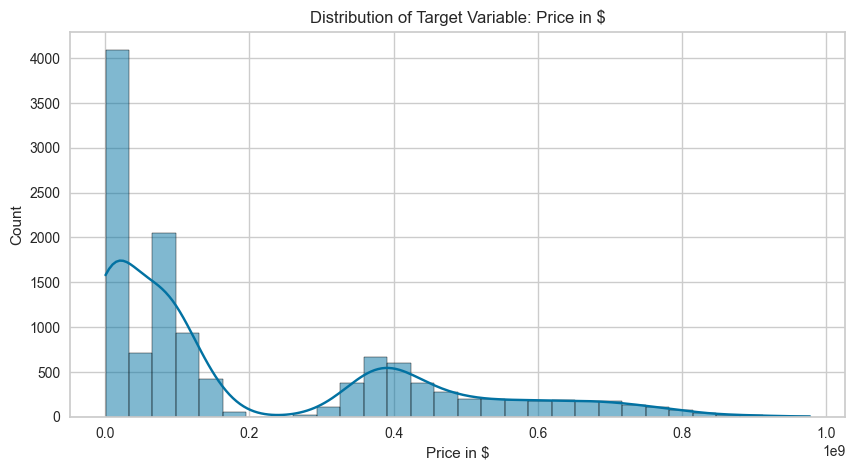

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price in $'], bins=30, kde=True)
plt.title("Distribution of Target Variable: Price in $")
plt.show()

### Correlation heatmap
This visually displays the relationship between numerical variables in the dataset. It helps identify how strongly features are related to each other and to the target variable (Price).

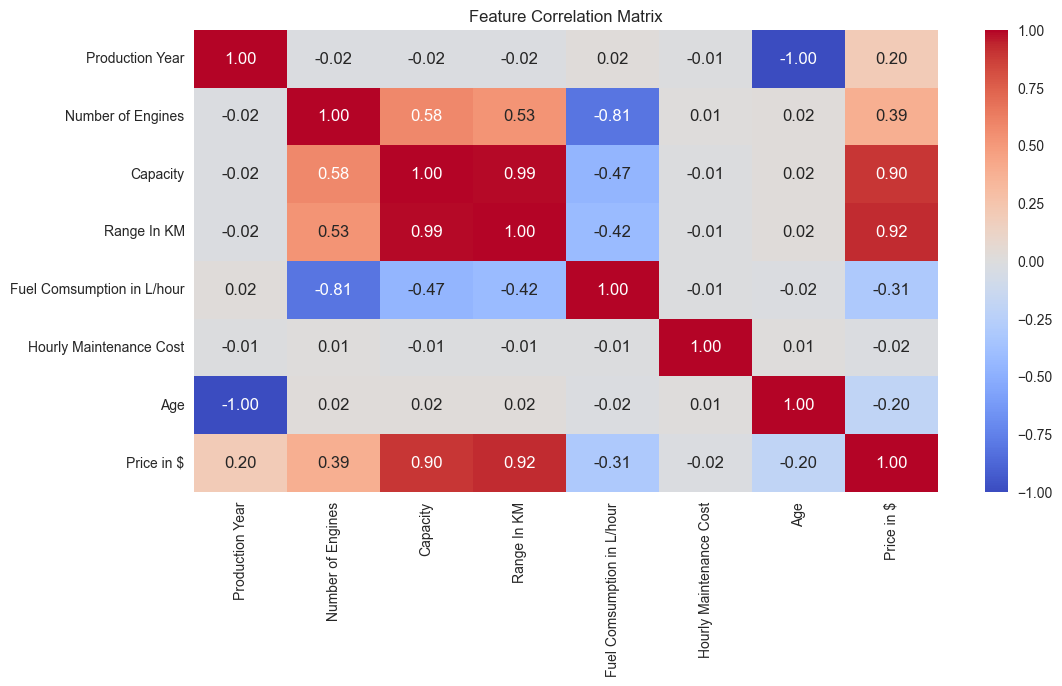

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

### Visualize categorical variables
Categorical variables represent discrete categories such as airplane models, engine types, or sales regions. Visualizing them helps understand their distribution and potential impact on the target variable

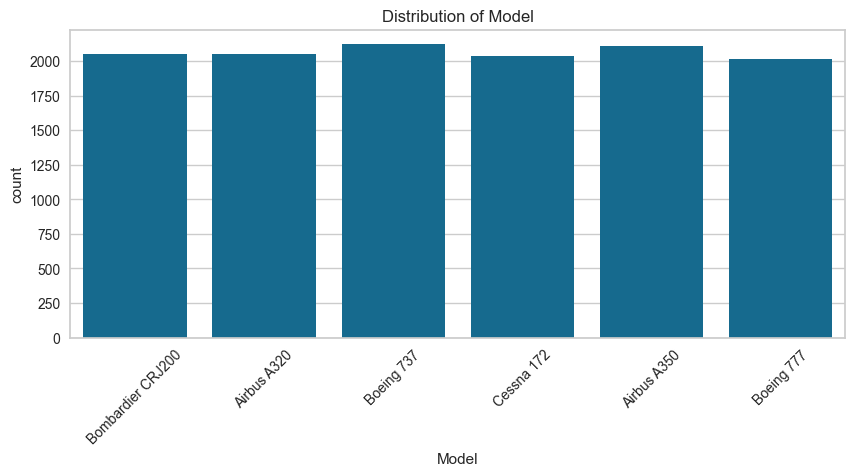

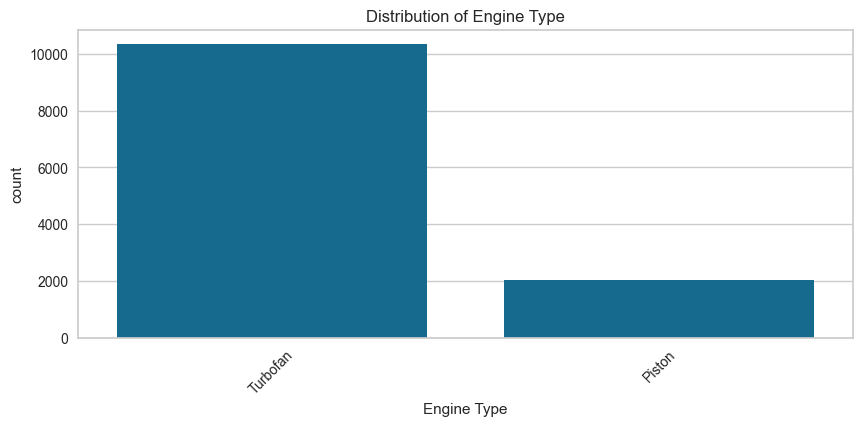

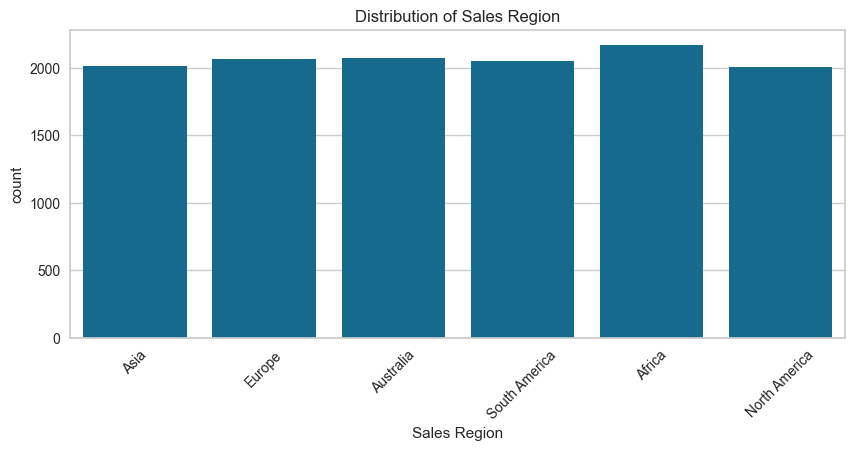

In [20]:
categorical_features = ['Model', 'Engine Type', 'Sales Region']
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

### Boxplot for Price by Sales Region
This boxplot shows the distribution of airplane prices across different sales regions. It's a great way to compare medians and interquartile ranges, and detect outliers across categories

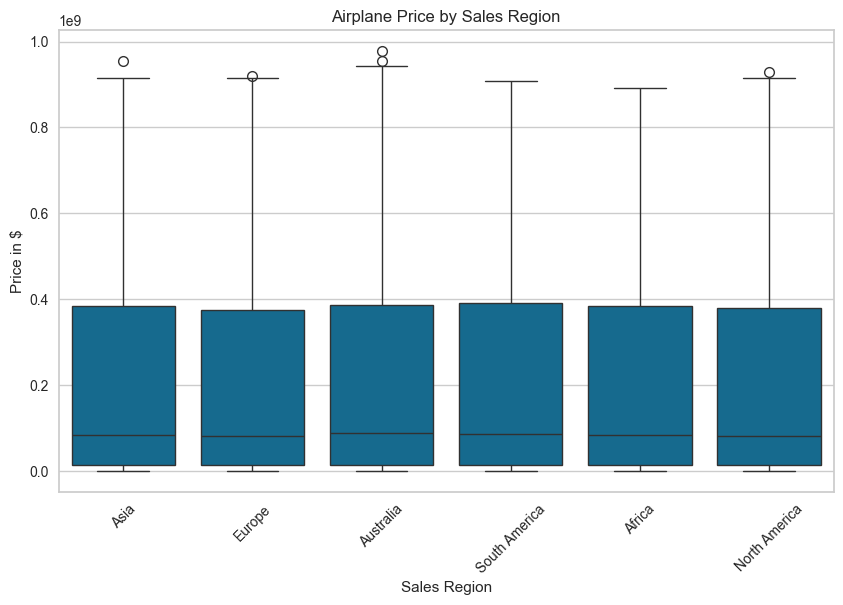

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sales Region', y='Price in $')
plt.title('Airplane Price by Sales Region')
plt.xticks(rotation=45)
plt.show()

### Scatter plot: Range vs Price
This boxplot shows the distribution of airplane prices across different sales regions. It's a great way to compare:
Medians (middle line in each box)
Interquartile ranges (the box height)
Outliers (individual points outside the whiskers)
By visualizing this, we can quickly understand how airplane prices vary by region and identify regions with higher or more variable pricing.

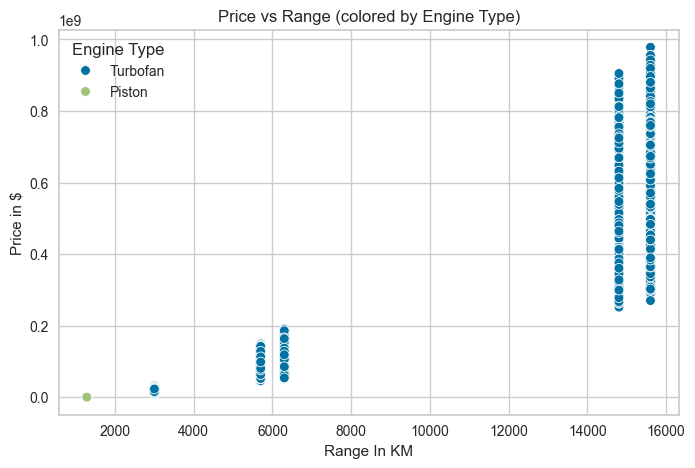

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Range In KM', y='Price in $', hue='Engine Type')
plt.title('Price vs Range (colored by Engine Type)')
plt.show()

### Setup PyCaret
The setup() function is the first and most important step in any PyCaret workflow. It initializes the machine learning environment by:
Connecting the dataset to PyCaret
Identifying the target variable (what we want to predict)
Automatically detecting data types (categorical, numeric, etc.)
Applying optional preprocessing like normalization or encoding
After running setup(), PyCaret is fully prepared to build and compare machine learning models with just a few lines of code.

In [37]:
exp = RegressionExperiment()
s = exp.setup(data=df, target='Price in $', session_id=123, 
                         categorical_features=['Model', 'Engine Type', 'Sales Region'],
                         normalize=True)

,Description,Value
0,Session id,123
1,Target,Price in $
2,Target type,Regression
3,Original data shape,"(12377, 11)"
4,Transformed data shape,"(12377, 21)"
5,Transformed train set shape,"(8663, 21)"
6,Transformed test set shape,"(3714, 21)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


### Checking Transformed Target Distribution
This line displays how often each transformed value of the target variable appears in the dataset. It's useful when you've enabled transform_target=True in PyCaret's setup() to apply transformations (like log or power transforms) to the target variable — usually to reduce skewness and improve model performance.
It helps you:
Understand the distribution of transformed target values
Verify the transformation worked as expected (in regression)

In [39]:
s.y_transformed.value_counts()

Price in $
2.393286e+05    2
6.216800e+08    2
3.682830e+08    2
4.045336e+05    2
4.159939e+08    2
               ..
3.598852e+08    1
1.021555e+08    1
1.169245e+08    1
2.333224e+05    1
1.122383e+08    1
Name: count, Length: 12372, dtype: int64

### Comparing and Selecting the Best Model
This line automatically compares multiple machine learning models using default evaluation metrics. It returns the best-performing model based on your data.

In [38]:
best_model = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16611383.9398,969933217992557.0000,31111524.6802,0.9814,0.5917,0.7528,0.6670
lightgbm,Light Gradient Boosting Machine,16973716.9290,1036007641943118.6250,32157919.8788,0.9801,0.4032,0.3349,0.2830
catboost,CatBoost Regressor,17128281.1091,1048631742756579.3750,32357054.3359,0.9799,0.5698,0.5820,2.3550
rf,Random Forest Regressor,17426727.6315,1108981850272839.6250,33263827.1734,0.9787,0.1093,0.0879,1.6690
ada,AdaBoost Regressor,19567009.6888,1147350759222041.5000,33844916.7250,0.9780,0.1997,0.1635,0.1700
knn,K Neighbors Regressor,18197808.2000,1222437792802406.5000,34913837.0000,0.9766,0.1145,0.0915,0.1090
et,Extra Trees Regressor,18790514.8933,1333286399194049.5000,36448788.4093,0.9745,0.1181,0.0943,1.0390
dt,Decision Tree Regressor,23023828.1601,1945955132176547.7500,44038794.7850,0.9627,0.1463,0.1165,0.1110
ridge,Ridge Regression,48782719.7988,4445600822902024.0000,66645046.9652,0.9149,2.0621,25.7723,0.0830
lasso,Lasso Regression,48784145.7348,4445601347122057.0000,66645059.5668,0.9149,2.0624,25.7743,0.2260


### Hyperparameter Tuning of the Best Model
This line takes the best model found earlier and tries different combinations of its hyperparameters (settings) to improve its performance.

### Hyperparameters?
They are like dials or knobs you can adjust on a model to make it perform better.

In [26]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17057411.2426,1023014684254511.8750,31984600.7362,0.9797,0.7448,1.1204
1,18825248.8382,1228807176712316.5000,35054346.0460,0.9763,0.6203,0.8088
2,19067447.8114,1238492076356797.5000,35192216.1331,0.9753,0.7500,1.0507
3,18505812.6142,1191865566858484.0000,34523406.0727,0.9767,0.7349,1.0312
4,18906811.5977,1198048647291191.2500,34612839.3417,0.9778,0.7331,1.0114
5,18989576.5993,1138608994013798.7500,33743280.7239,0.9797,0.6498,0.7805
6,18093403.5730,1152056732578489.2500,33941961.2365,0.9770,0.7632,1.1625
7,18565592.8488,1228638414200258.2500,35051938.8080,0.9776,0.7523,1.0085
8,18245279.3132,1152629740526779.5000,33950401.1836,0.9779,0.6675,0.8769


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Creating a Gradient Boosting Regressor Model
This line creates a Gradient Boosting Regressor (GBR) model using PyCaret. GBR is a powerful ensemble learning algorithm that builds models in a sequence to correct previous errors, resulting in high accuracy.
'gbr' is the PyCaret short code for Gradient Boosting Regressor
s.create_model() initializes the model with default parameters
The second line displays the model summary (name, settings, performance)

In [40]:
lr_mdl = s.create_model('gbr')
lr_mdl

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15079819.0340,794063140434292.5000,28179125.9700,0.9843,0.6315,0.8461
1,16380371.1739,980502978483802.5000,31312984.1836,0.9811,0.5373,0.6583
2,17203733.2364,1056910488732541.7500,32510159.7771,0.9789,0.5818,0.7424
3,17310849.9033,1016902636225789.5000,31888910.8661,0.9801,0.6267,0.8287
4,16961190.2243,967357876965601.7500,31102377.3523,0.9821,0.5323,0.6389
5,16870718.0520,951854656480760.3750,30852141.8459,0.9830,0.6026,0.7263
6,16163540.1703,910628005665999.8750,30176613.5553,0.9818,0.6253,0.7705
7,16646997.7369,1005486692712683.7500,31709410.1603,0.9817,0.6351,0.8604
8,15936610.7020,890166779929931.6250,29835662.8874,0.9829,0.5425,0.6610


GradientBoostingRegressor(random_state=123)

In [41]:
lr_mdl

GradientBoostingRegressor(random_state=123)

### Interactive Model Evaluation Dashboard
This line launches an interactive dashboard in PyCaret to visually assess the performance of your trained model

In [42]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

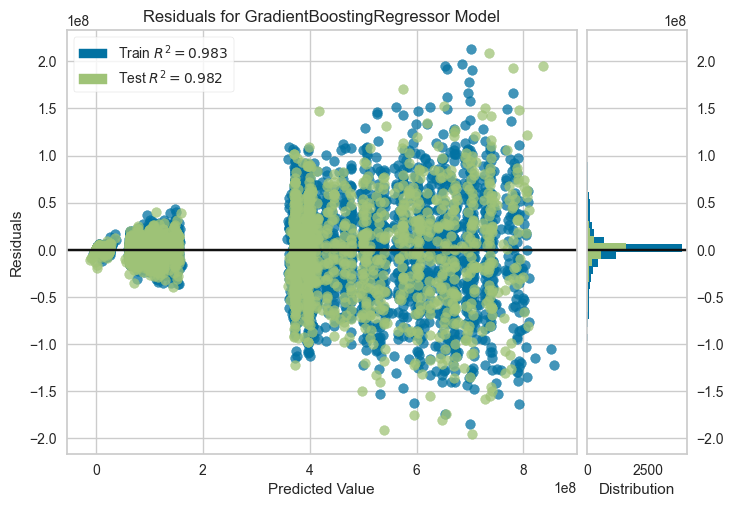

In [45]:
plot_model(tuned_model, plot='residuals')

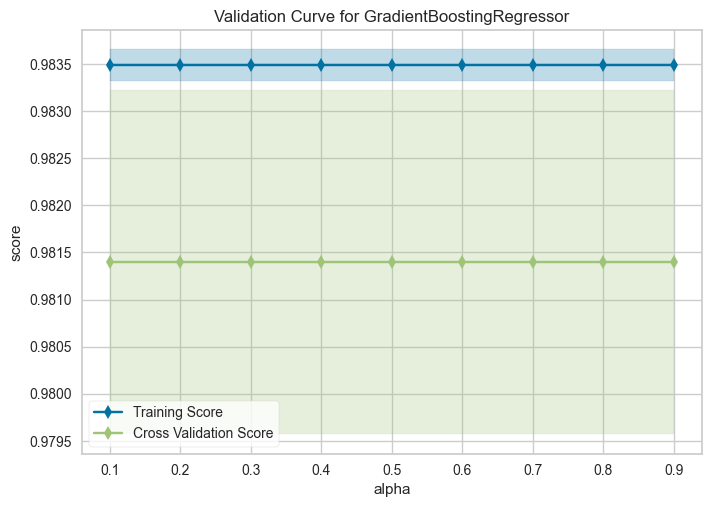

In [46]:
plot_model(tuned_model, plot='vc')

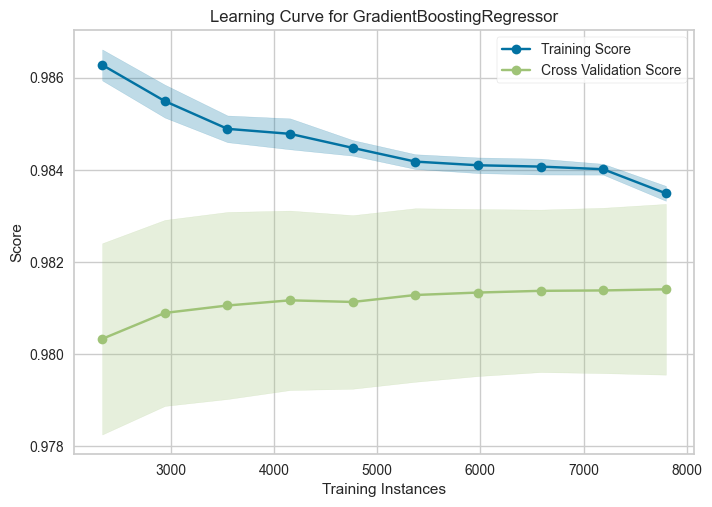

In [44]:
plot_model(tuned_model, plot='learning')

### Retrieving and Displaying Final Model Metrics
This code pulls the most recent output table from PyCaret (in this case, the results from evaluate_model() or tune_model()), and stores it in a DataFrame called final_metrics.
It gives you a clean, printable version of your model’s performance metrics, such as:
R² score
Mean Absolute Error (MAE)
Root Mean Squared Error (RMSE)
And others depending on your problem type

In [19]:
final_metrics = pull()
print("\nFinal tuned model metrics:")
print(final_metrics)


Final tuned model metrics:
               MAE           MSE          RMSE      R2   RMSLE    MAPE
Fold                                                                  
0     1.705741e+07  1.023015e+15  3.198460e+07  0.9797  0.7448  1.1204
1     1.882525e+07  1.228807e+15  3.505435e+07  0.9763  0.6203  0.8088
2     1.906745e+07  1.238492e+15  3.519222e+07  0.9753  0.7500  1.0507
3     1.850581e+07  1.191866e+15  3.452341e+07  0.9767  0.7349  1.0312
4     1.890681e+07  1.198049e+15  3.461284e+07  0.9778  0.7331  1.0114
5     1.898958e+07  1.138609e+15  3.374328e+07  0.9797  0.6498  0.7805
6     1.809340e+07  1.152057e+15  3.394196e+07  0.9770  0.7632  1.1625
7     1.856559e+07  1.228638e+15  3.505194e+07  0.9776  0.7523  1.0085
8     1.824528e+07  1.152630e+15  3.395040e+07  0.9779  0.6675  0.8769
9     1.948631e+07  1.372556e+15  3.704803e+07  0.9732  0.6664  0.8556
Mean  1.857429e+07  1.192472e+15  3.451030e+07  0.9771  0.7082  0.9706
Std   6.376664e+05  8.487974e+13  1.229190e+06  0

### Saving the Trained Model to Disk
This line saves your trained and tuned model to your computer with the filename 'best_airplane_model.pkl'.

In [20]:
save_model(tuned_model, 'best_airplane_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Production Year',
                                              'Number of Engines', 'Capacity',
                                              'Range In KM',
                                              'Fuel Comsumption in L/hour',
                                              'Hourly Maintenance Cost', 'Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Model', 'Engine Type',
                                              'Sales Region'],
                                     transformer=SimpleImpute...
                  TransformerWrapper(include=['Model', 'Sales Region'],
                                     transformer=OneHotEncoder(cols=['Model',
                                                                     'Sales '
                        

### Making Predictions on Test Data (with Metrics)
This line uses the tuned machine learning model to make predictions on a hold-out validation set (automatically split during setup()).
 What it does:
Makes predictions on unseen data
Calculates and displays evaluation metrics (like MAE, RMSE, R² for regression)
Returns a DataFrame that includes actual vs. predicted values

In [40]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16385699.7856,946612445552629.0000,30767067.5488,0.9821,0.6073,0.7927


,Model,Production Year,Number of Engines,Engine Type,Capacity,Range In KM,Fuel Comsumption in L/hour,Hourly Maintenance Cost,Age,Sales Region,Price in $,prediction_label
2514,Bombardier CRJ200,2018,2,Turbofan,50,3000,6.74,2840.719971,5,South America,21141972.0,2.094302e+07
7350,Boeing 777,1983,2,Turbofan,396,15600,4.83,4463.470215,40,Africa,419564768.0,4.021522e+08
7805,Bombardier CRJ200,1998,2,Turbofan,50,3000,8.88,833.020020,25,Asia,13277089.0,1.279451e+07
8995,Bombardier CRJ200,1999,2,Turbofan,50,3000,5.81,2239.540039,24,Europe,12710695.0,1.427317e+07
11433,Boeing 737,1987,2,Turbofan,162,5700,2.68,4295.669922,36,South America,55793596.0,6.308117e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
6169,Boeing 737,1988,2,Turbofan,162,5700,4.26,4121.129883,35,South America,70389880.0,6.414798e+07
9501,Boeing 777,1999,2,Turbofan,396,15600,10.58,4863.089844,24,Africa,444307680.0,4.106771e+08
3220,Airbus A350,1989,2,Turbofan,350,14800,2.46,1841.189941,34,South America,340137728.0,3.689816e+08
2926,Boeing 737,1997,2,Turbofan,162,5700,8.10,2065.860107,26,Africa,58788684.0,6.397963e+07


#  Conclusion
This project successfully applied regression modeling using PyCaret to build an efficient and accurate predictive model for airplane prices. PyCaret’s regression module streamlined the entire machine learning pipeline—from setup and comparison to tuning and evaluation. By leveraging automation, the project was able to save time while ensuring that our model was both well-optimized and ready for deployment.